In [1]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#necessary libraries to handle dataframes and numeric data 
import pandas as pd
import numpy as np

# for visuals
import pylab as plt
import seaborn as sns
%matplotlib inline

# for data splitting into train and test
from sklearn.model_selection import train_test_split as tts

#the model
from sklearn.linear_model import LogisticRegression

#the metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# to standardize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#to save the model
import pickle

# to get the most important columns
from sklearn.inspection import permutation_importance

## Preprocessing 1:

Keeping outliers,downsampling non-fraud cases, getting dummies for column 'type', standardising using standardscaler.

In [2]:
data_pp1=pd.read_csv('../../data/second/data_pp1.csv')

Importing the data

In [3]:
data_pp1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,1,0,0,0,0,0,1
1,1,181.0,181.0,0.0,21182.0,0.0,1,0,0,1,0,0,0
2,1,2806.0,2806.0,0.0,0.0,0.0,1,0,0,0,0,0,1
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,0,0,1,0,0,0
4,1,20128.0,20128.0,0.0,0.0,0.0,1,0,0,0,0,0,1


In [4]:
X_pp1=data_pp1.drop('isFraud', axis=1)
y_pp1=data_pp1['isFraud']

Defining my target column

In [30]:
X_train1, X_test1, y_train1, y_test1 =tts(X_pp1, y_pp1, 
                                       random_state=42,
                                       stratify=y_pp1)


Splitting into train and test

In [7]:
escalador = StandardScaler()   
 
escalador.fit(X_train1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
 
X_train1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = escalador.transform(X_train1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])   
X_test1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = escalador.transform(X_test1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])  


Standardizing the data using standardscaler

In [8]:
X_train1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
14450,277,-0.439946,-0.384908,-0.211217,-0.296040,-0.386025,0,0,0,0,1,0
6029,546,-0.429963,-0.379685,-0.212037,-0.296040,-0.386025,0,0,0,0,0,1
12951,300,-0.260930,-0.370837,-0.050621,-0.274270,-0.386025,0,1,0,0,0,0
8697,370,-0.308936,-0.387496,-0.212037,0.551333,0.412887,0,0,1,0,0,0
3129,276,0.399893,0.106781,-0.212037,-0.296040,-0.386025,0,0,0,0,0,1


Seeing the data after standardization

In [9]:
lr_pp1=LogisticRegression()

Initiating the model

In [10]:
lr_pp1.fit(X_train1, y_train1)

LogisticRegression()

Training the model

In [11]:
y_test_pred_pp1 = lr_pp1.predict(X_test1)

In [12]:
y_train_pred_pp1 = lr_pp1.predict(X_train1)

Getting the predictions for both test and train data (I need to get both to check whether my model is overfitted or not)

In [13]:
#Getting the metrics for each model for train and test 

def metrics(y_test, y_test_pred_model, y_train, y_train_pred_model, model):
    
    accuracy_test = accuracy_score(y_test, y_test_pred_model)
    precision_test = precision_score(y_test, y_test_pred_model)
    recall_test = recall_score(y_test, y_test_pred_model)
    f1_test = f1_score(y_test, y_test_pred_model)
    kappa_test = cohen_kappa_score(y_test, y_test_pred_model)

    accuracy_train = accuracy_score(y_train, y_train_pred_model)
    precision_train = precision_score(y_train, y_train_pred_model)
    recall_train = recall_score(y_train, y_train_pred_model)
    f1_train = f1_score(y_train, y_train_pred_model)
    kappa_train = cohen_kappa_score(y_train, y_train_pred_model)

    
    df = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                       'precision': [precision_test, precision_train],
                       'recall': [recall_test, recall_train], 
                       'f1': [f1_test, f1_train],
                       'kapppa': [kappa_test, kappa_train],
                       'set': ['test', 'train' ]})
    
    df['model'] = model
    return df

In [14]:
results_pp1= metrics(y_test1, y_test_pred_pp1, y_train1, y_train_pred_pp1, 'Logistic Regression pp1')

Getting the metrics for my model

In [15]:
results_pp1

,accuracy,precision,recall,f1,kapppa,set,model
0,0.912345,0.918438,0.905017,0.911678,0.824689,test,Logistic Regression pp1
1,0.914522,0.917990,0.910390,0.914174,0.829045,train,Logistic Regression pp1


The model is working ok but it could be better. The metric that interests me the most out of all the metrics above is the 'recall' since it is the one taking into account the False Negatives which are the predictions I want to decrease as much as possible. I prefer to have False Positives over False Negatives in this project. 

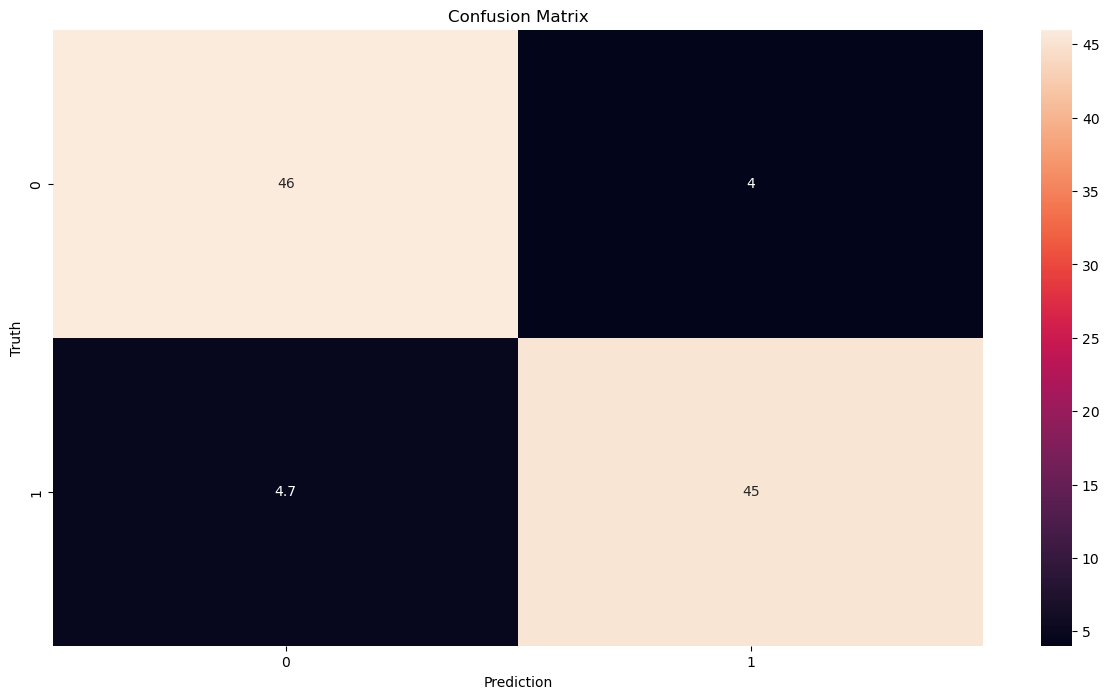

In [50]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test1, y_test_pred_pp1)/cm(y_test1, y_test_pred_pp1).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


From the confusion matrix above we can see this model has 46% True Negatives (Predicted not fraud when it is actually not fraud),  45% True Positives (Predicted fraud that is actually fraud), 4.7% False Negatives (Predicted no fraud when there was fraud) and 4% False Positives (Predicted fraud when there was no fraud) 

In [22]:
#Getting the confusion matrix in df format as well
conf_matrix_pp1 = cm(y_test1, y_test_pred_pp1)

conf_matrix_pp1_df = pd.DataFrame(conf_matrix_pp1, columns=['Predicted no fraud', 'Predicted fraud'], index=['Actual no fraud', 'Actual fraud'])
conf_matrix_pp1_df

,Predicted no fraud,Predicted fraud
Actual no fraud,1889,165
Actual fraud,195,1858


step: 0.03259475691908119
amount: 0.01034818602386165
oldbalanceOrg: 0.19302816329843353
newbalanceOrig: 0.06574953331710083
oldbalanceDest: 0.033568703838974055
newbalanceDest: 0.12634526418310196
isFlaggedFraud: 0.0
type_CASH_IN: 0.045824202580959296
type_CASH_OUT: 0.09462705949192428
type_DEBIT: 4.869734599461939e-05
type_PAYMENT: 0.06057138219300375
type_TRANSFER: 0.16368801233666094


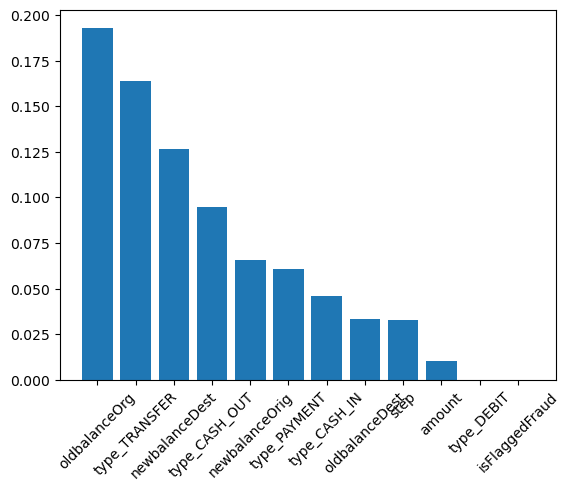

In [19]:
#calculating the importance of each column 

perm_importancepp1 = permutation_importance(lr_pp1, X_test1, y_test1, n_repeats=30, random_state=42)

for feature, importance in zip(X_pp1.columns, perm_importancepp1.importances_mean):
    print(f"{feature}: {importance}")

sorted_idx = perm_importancepp1.importances_mean.argsort()[::-1]
plt.bar(range(X_pp1.shape[1]), perm_importancepp1.importances_mean[sorted_idx])
plt.xticks(range(X_pp1.shape[1]), X_pp1.columns[sorted_idx], rotation=45)
plt.show()


In [20]:
# getting the importance of the columns in df format
feature_importancepp1 = pd.DataFrame({'Model': 'Logistic Regression pp1',
    'Feature': X_pp1.columns,
    'Importance': perm_importancepp1.importances_mean})
feature_importancepp1

,Model,Feature,Importance
0,Logistic Regression pp1,step,0.032595
1,Logistic Regression pp1,amount,0.010348
2,Logistic Regression pp1,oldbalanceOrg,0.193028
3,Logistic Regression pp1,newbalanceOrig,0.065750
4,Logistic Regression pp1,oldbalanceDest,0.033569
5,Logistic Regression pp1,newbalanceDest,0.126345
6,Logistic Regression pp1,isFlaggedFraud,0.000000
7,Logistic Regression pp1,type_CASH_IN,0.045824
8,Logistic Regression pp1,type_CASH_OUT,0.094627
9,Logistic Regression pp1,type_DEBIT,0.000049


## Preprocessing 2

Removing outliers,downsampling non-fraud cases, using labelencoder to convert column 'type' to numerical, standardising using minmax. 

In [23]:
data_pp2=pd.read_csv('../../data/second/data_pp2.csv')

Opening my data

In [24]:
data_pp2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,252,3,9705.01,97382.00,87676.99,0.00,0.0,0,0
1,130,3,1418.55,0.00,0.00,0.00,0.0,0,0
2,19,3,41906.02,24888.89,0.00,0.00,0.0,0,0
3,358,3,27369.17,22002.00,0.00,0.00,0.0,0,0
4,228,1,26945.32,29732.00,2786.68,702178.98,729124.3,0,0


In [26]:
X_pp2=data_pp2.drop('isFraud', axis=1)
y_pp2=data_pp2['isFraud']

Defining my target column

In [29]:
X_train2, X_test2, y_train2, y_test2 = tts(X_pp2, y_pp2, 
                                       random_state=42,
                                       stratify=y_pp2)

Dividing into train and test

In [31]:
scaler = MinMaxScaler()
 
scaler.fit(X_train2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
 
X_train2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.transform(X_train2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])   
X_test2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.transform(X_test2[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])  


Standardizing the data using minmaxscaler

In [32]:
X_train2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
37585,156,3,0.004310,0.633483,0.465212,0.000000,0.000000,0
194824,539,4,0.158660,0.296739,0.000000,0.000000,0.000000,0
67249,191,3,0.019503,0.156037,0.088934,0.000000,0.000000,0
152998,336,4,0.408893,0.764745,0.000000,0.000000,0.000000,0
282809,450,4,0.043272,0.080930,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
77003,250,0,0.327474,0.151030,0.567918,0.208790,0.118281,0
54792,237,3,0.012822,0.001320,0.000000,0.000000,0.000000,0
53063,236,3,0.019832,0.042243,0.003832,0.000000,0.000000,0
211491,59,4,0.019433,0.036345,0.000000,0.000000,0.000000,0


checking the data after standardization

In [33]:
lr_pp2=LogisticRegression()

Initiated the model

In [34]:
lr_pp2.fit(X_train2, y_train2)

LogisticRegression()

Fitting the model

In [35]:
y_test_pred_pp2 = lr_pp2.predict(X_test2)

In [36]:
y_train_pred_pp2 = lr_pp2.predict(X_train2)

Getting the predictions

In [37]:
results_pp2= metrics(y_test2, y_test_pred_pp2, y_train2, y_train_pred_pp2, 'Logistic Regression pp2')

Getting the metrics for the model

In [38]:
results_pp2

,accuracy,precision,recall,f1,kapppa,set,model
0,0.929907,0.941310,0.916987,0.928989,0.859813,test,Logistic Regression pp2
1,0.930360,0.940401,0.918960,0.929557,0.860720,train,Logistic Regression pp2


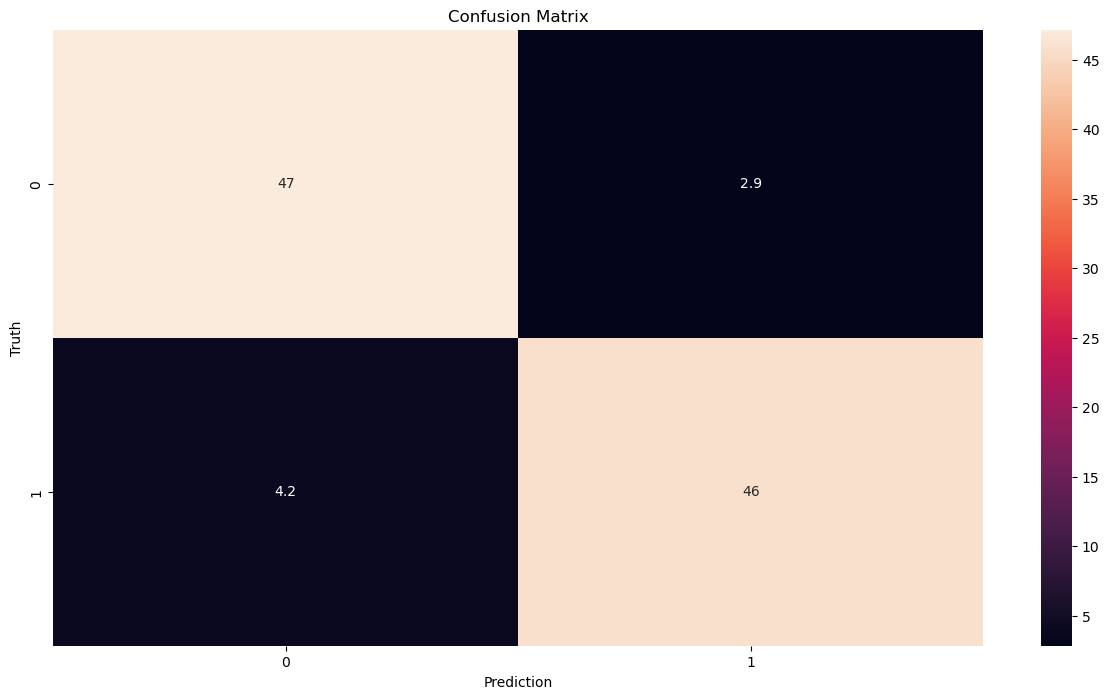

In [51]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test2, y_test_pred_pp2)/cm(y_test2, y_test_pred_pp2).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();



From the confusion matrix above we can see this model has 47% True Negatives (Predicted not fraud when it is actually not fraud),  46% True Positives (Predicted fraud that is actually fraud), 4.2% False Negatives (Predicted no fraud when there was fraud) and 2.9% False Positives (Predicted fraud when there was no fraud) 

In [40]:
# confusion matrix in df form
conf_matrix_pp2 = cm(y_test2, y_test_pred_pp2)

conf_matrix_pp2_df = pd.DataFrame(conf_matrix_pp2, columns=['Predicted no fraud', 'Predicted fraud'], index=['Actual no fraud', 'Actual fraud'])
conf_matrix_pp2_df

,Predicted no fraud,Predicted fraud
Actual no fraud,35356,2144
Actual fraud,3113,34387


step: 0.00015733333333332045
type: 0.008420444444444427
amount: 0.16021822222222223
oldbalanceOrg: 0.3949311111111111
newbalanceOrig: 0.16352088888888885
oldbalanceDest: 0.026359999999999988
newbalanceDest: 0.008577777777777773
isFlaggedFraud: 0.0


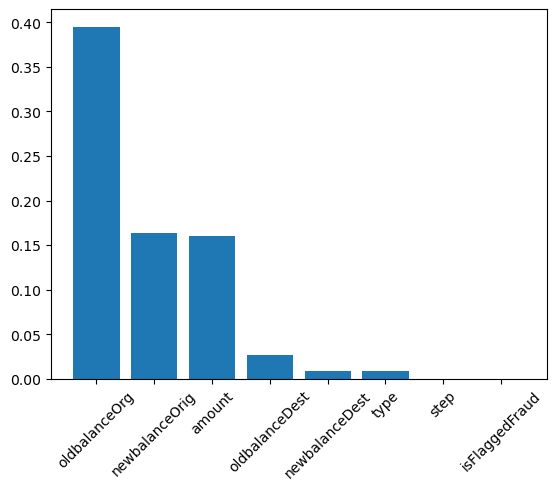

In [42]:
#calculating the importance of each column
perm_importancepp2 = permutation_importance(lr_pp2, X_test2, y_test2, n_repeats=30, random_state=42)

for feature, importance in zip(X_pp2.columns, perm_importancepp2.importances_mean):
    print(f"{feature}: {importance}")

sorted_idx = perm_importancepp2.importances_mean.argsort()[::-1]
plt.bar(range(X_pp2.shape[1]), perm_importancepp2.importances_mean[sorted_idx])
plt.xticks(range(X_pp2.shape[1]), X_pp2.columns[sorted_idx], rotation=45)
plt.show()


In [43]:
# column importance in df
feature_importancepp2 = pd.DataFrame({'Model': 'Logistic Regression pp2',
    'Feature': X_pp2.columns,
    'Importance': perm_importancepp2.importances_mean})
feature_importancepp2

,Model,Feature,Importance
0,Logistic Regression pp2,step,0.000157
1,Logistic Regression pp2,type,0.008420
2,Logistic Regression pp2,amount,0.160218
3,Logistic Regression pp2,oldbalanceOrg,0.394931
4,Logistic Regression pp2,newbalanceOrig,0.163521
5,Logistic Regression pp2,oldbalanceDest,0.026360
6,Logistic Regression pp2,newbalanceDest,0.008578
7,Logistic Regression pp2,isFlaggedFraud,0.000000


## Combining the results

In [46]:
results=pd.concat([results_pp1, results_pp2], axis=0)

In [47]:
results

,accuracy,precision,recall,f1,kapppa,set,model
0,0.912345,0.918438,0.905017,0.911678,0.824689,test,Logistic Regression pp1
1,0.914522,0.917990,0.910390,0.914174,0.829045,train,Logistic Regression pp1
0,0.929907,0.941310,0.916987,0.928989,0.859813,test,Logistic Regression pp2
1,0.930360,0.940401,0.918960,0.929557,0.860720,train,Logistic Regression pp2


## Conclusions:

The preprocessing that works the best for this data is pp2. For both models we see that the train metrics are slightly better than the test data. This is normal. What we want to avoid is for a big difference between the test and train sets. If the train set´s metrics are a significantly higher than the test´s then it means that the model is overfitted (which is not the case here). 


In [ ]:
pickle.dump(lr_pp2, open('models/logistic_regression_pp2_default.pk', 'wb'))  
pickle.dump(lr_pp2, open('models/logistic_regression_pp2_default.pk', 'wb'))  